## 6.2 기저함수 모형과 과최적화

### 비선형 모형 

기본적인 선형회귀모형은 입력변수의 선형조합으로 이루어진다.

$$ y_i = \sum_{i=1}^{D} w_i x_i = w^T x $$

하지만 데이터가 다음 그림처럼 비선형이면 위와 같은 선형회귀모형은 적합하지 않다. 

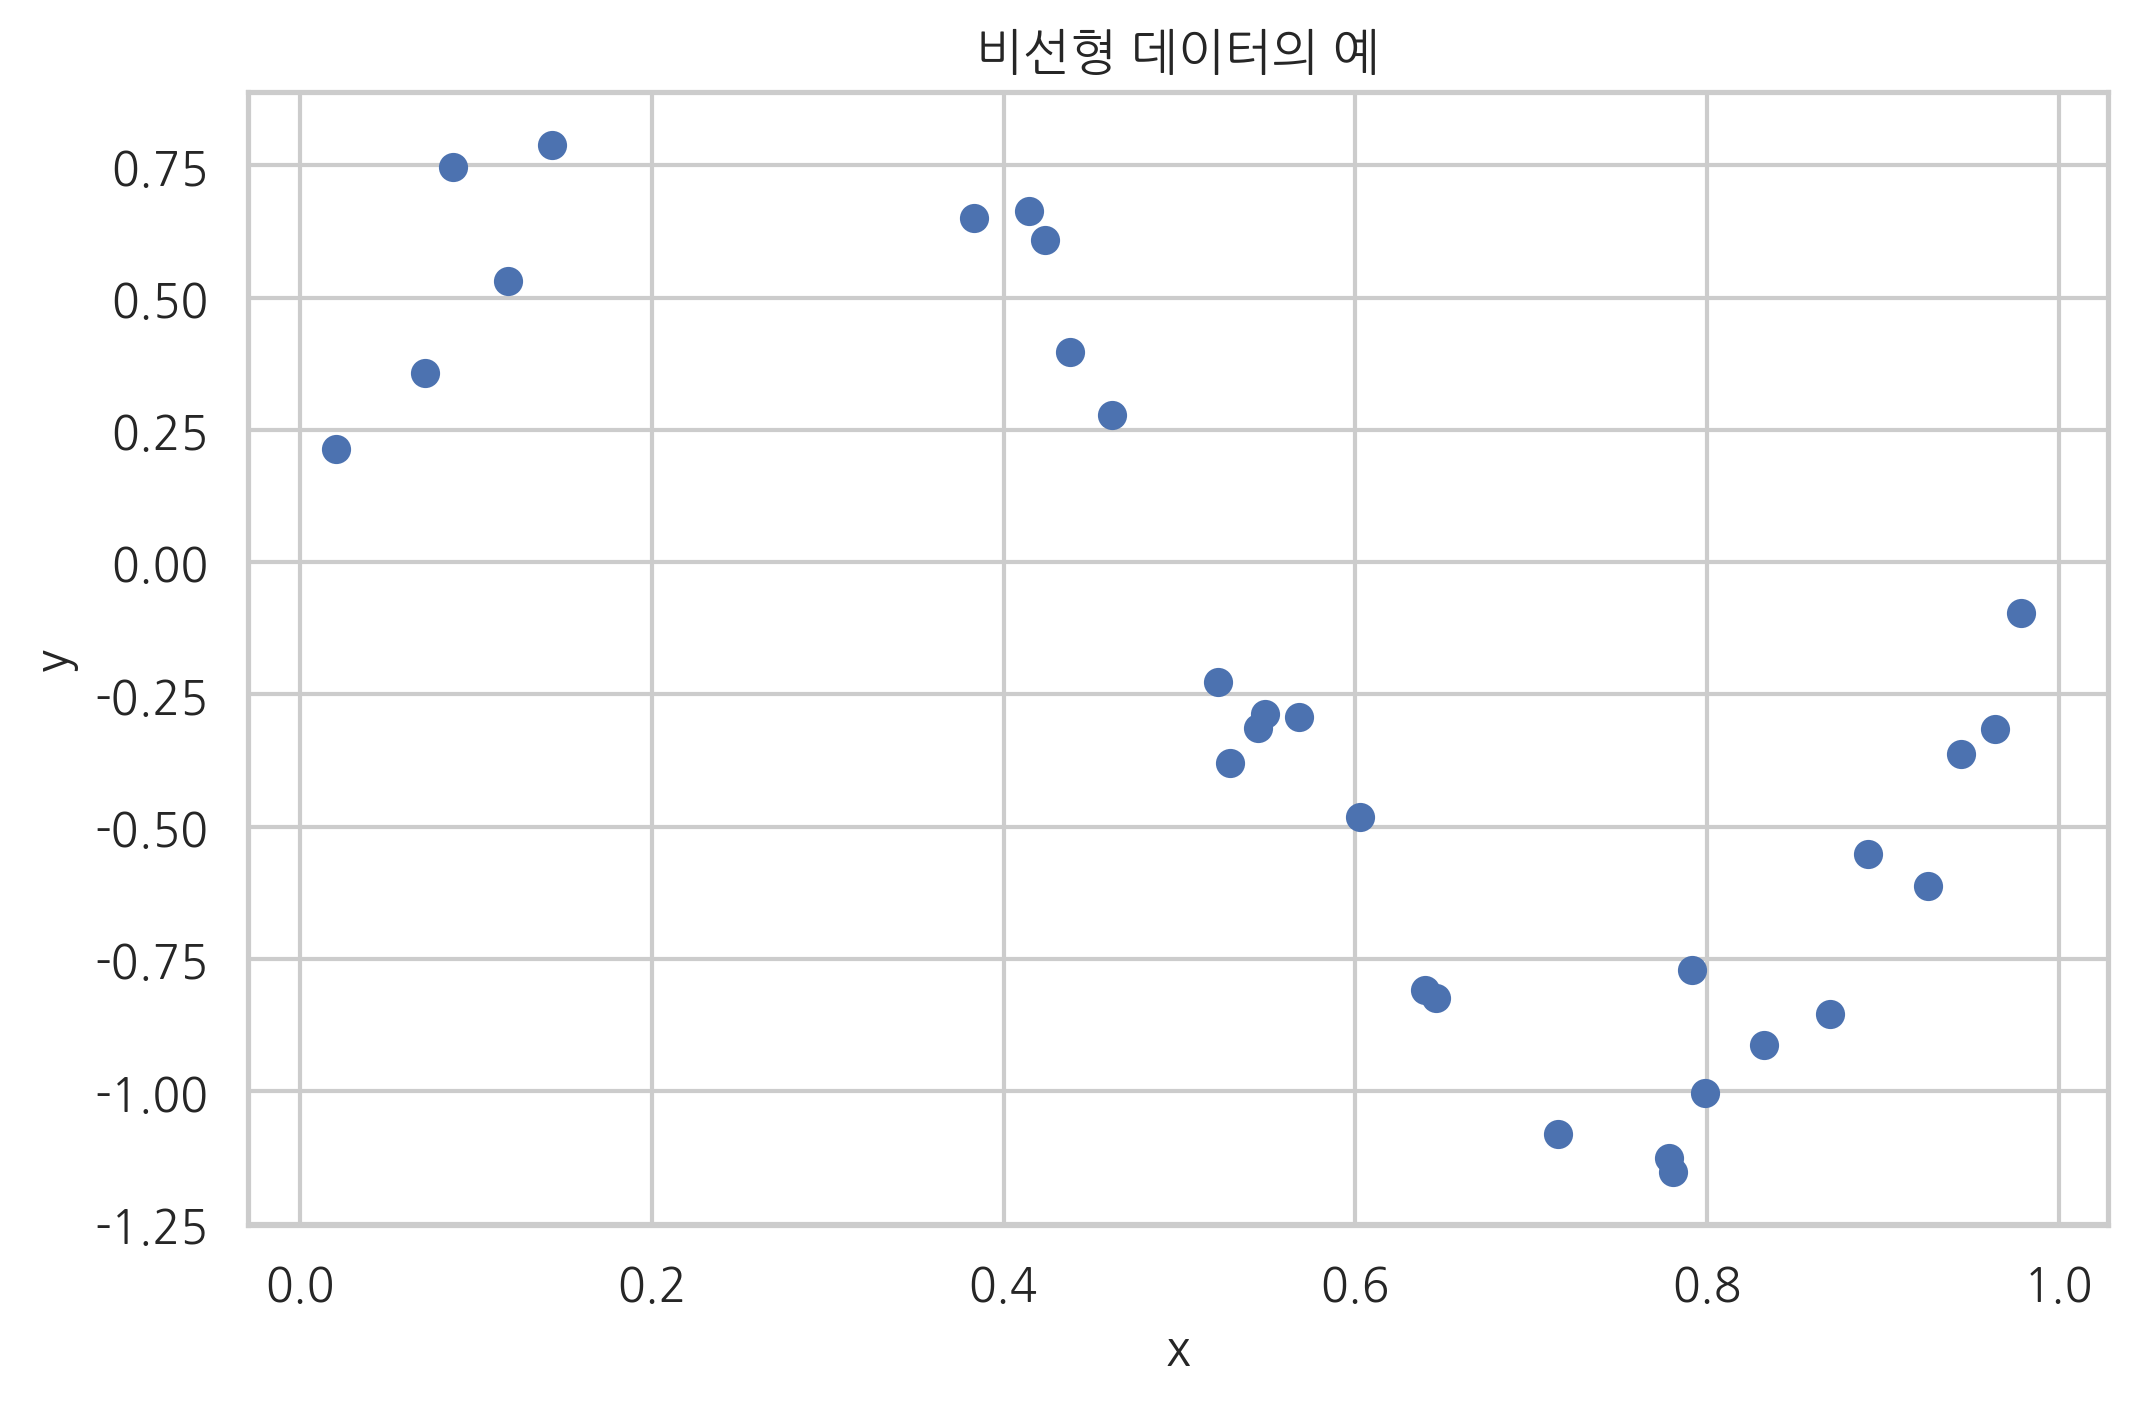

In [1]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

X, y = make_nonlinear()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("비선형 데이터의 예")
plt.show()

이 때는 독립변수 벡터 $x$를 입력으로 가지는 여러개의 비선형 함수 $\phi_j(x)$들을 생각해 내어 원래의 입력 변수 $x$대신 $\phi_j(x)$들을 입력변수로 사용한 다음과 같은 모형을 쓰면 더 좋은 예측 성능을 가질 수도 있다.

$$ y_i = \sum_{j=1}^{M} w_j \phi_j(x)  = w^T \phi(x)  $$

이 새로운 모형의 모수의 갯수는 원래의 독립변수의 갯수가 아니라 우리가 생각해 낸 비선형 함수의 갯수에 의존한다.

### 기저함수

하지만 이러한 비선형 모형을 만들기 위해서는 데이터에 적합한 비선형 함수를 충분히 많이 생각해 낼 수 있어야 한다. 이러한 고충을 덜기 위해 만들어진 것이 기저함수(basis function) 모형이다. 기저함수는 특정한 규칙에 따라 만들어지는 함수의 열(sequence)로서 충분히 많은 수의 함수가 있으면 어떤 모양의 함수라도 비슷하게 흉내낼 수 있는 것을 말한다.

기저함수 중 가장 간단한 것이 다항 기저함수(polynomial basis function)이다.

$$ \phi_0(x) = 1, \phi_1(x) = x, \phi_2(x) = x^2, \phi_3(x) = x^3, \cdots $$

다항회귀(polynomial regression)는 다항 기저함수를 사용하는 기저함수 모형이다. 따라서 종속 변수와 독립 변수의 관계는 다음과 같이 표현할 수 있다.

$$ y = w_0 + w_1x + w_2x^2  + \ldots  + w_M x^M $$

기저함수는 사람이 하나씩 생각해내는 것이 아니라 미리 만들어진 규칙에 의해 자동으로 생성되므로 비선형 함수를 만들기 위해 고민할 필요가 없다. 

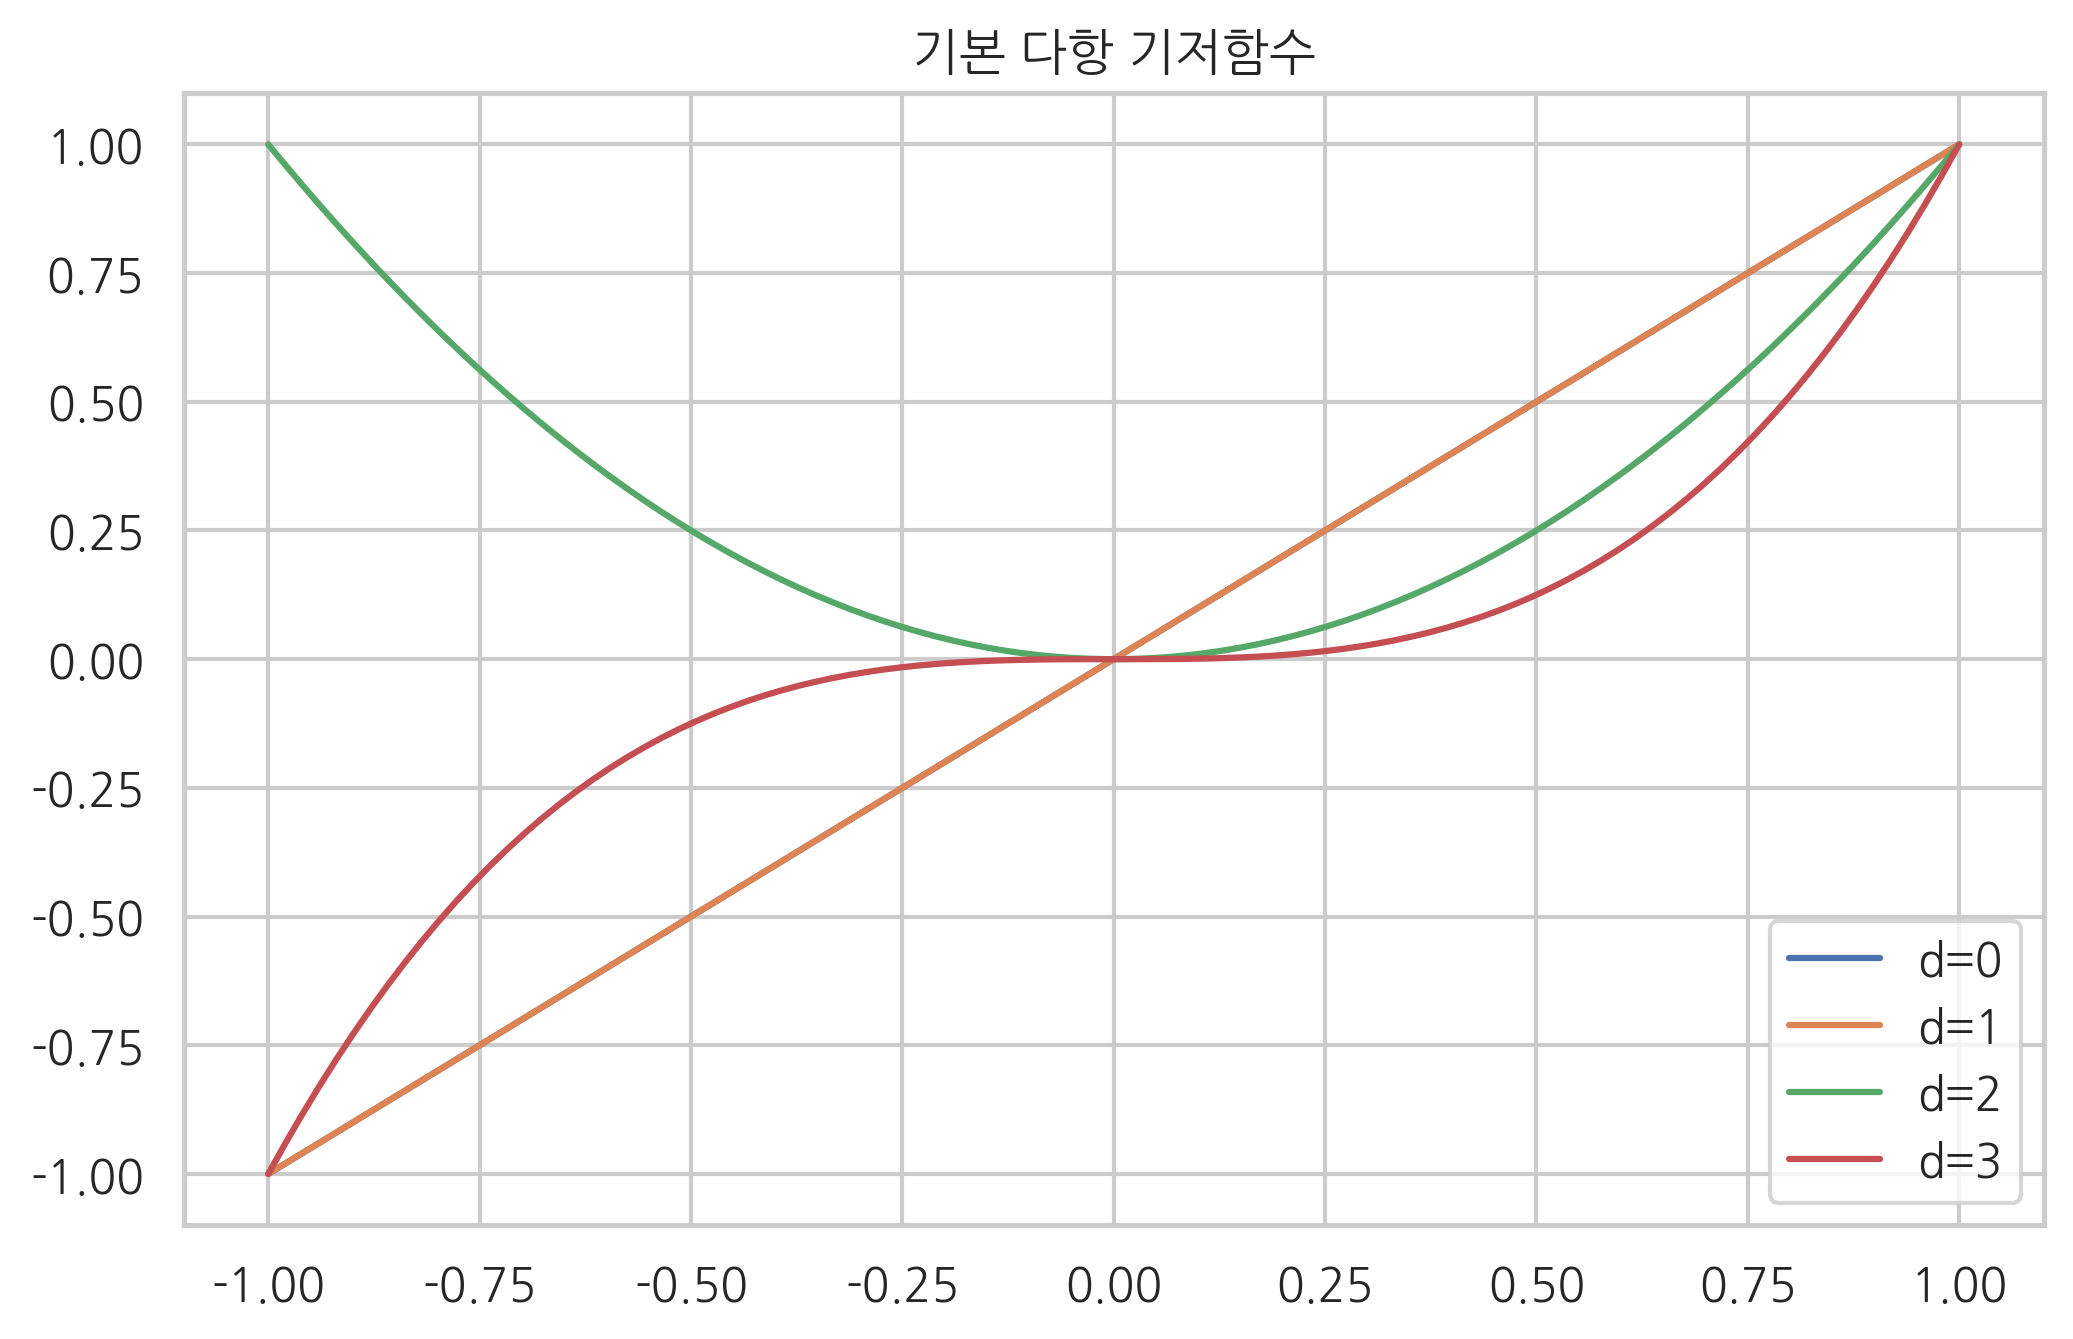

In [2]:
phi_0 = np.polynomial.Polynomial.basis(1)
phi_1 = np.polynomial.Polynomial.basis(1)
phi_2 = np.polynomial.Polynomial.basis(2)
phi_3 = np.polynomial.Polynomial.basis(3)

x = np.linspace(-1, 1, 100)

plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.legend()
plt.title("기본 다항 기저함수")
plt.show()

기저함수중에서도 서로 다른 두 기저함수의 곱의 정적분 값이 0이 되면 직교기저함수(orthogonal basis function)라고 한다. 체비세프 다항식은 직교기저함수의 한 예다.

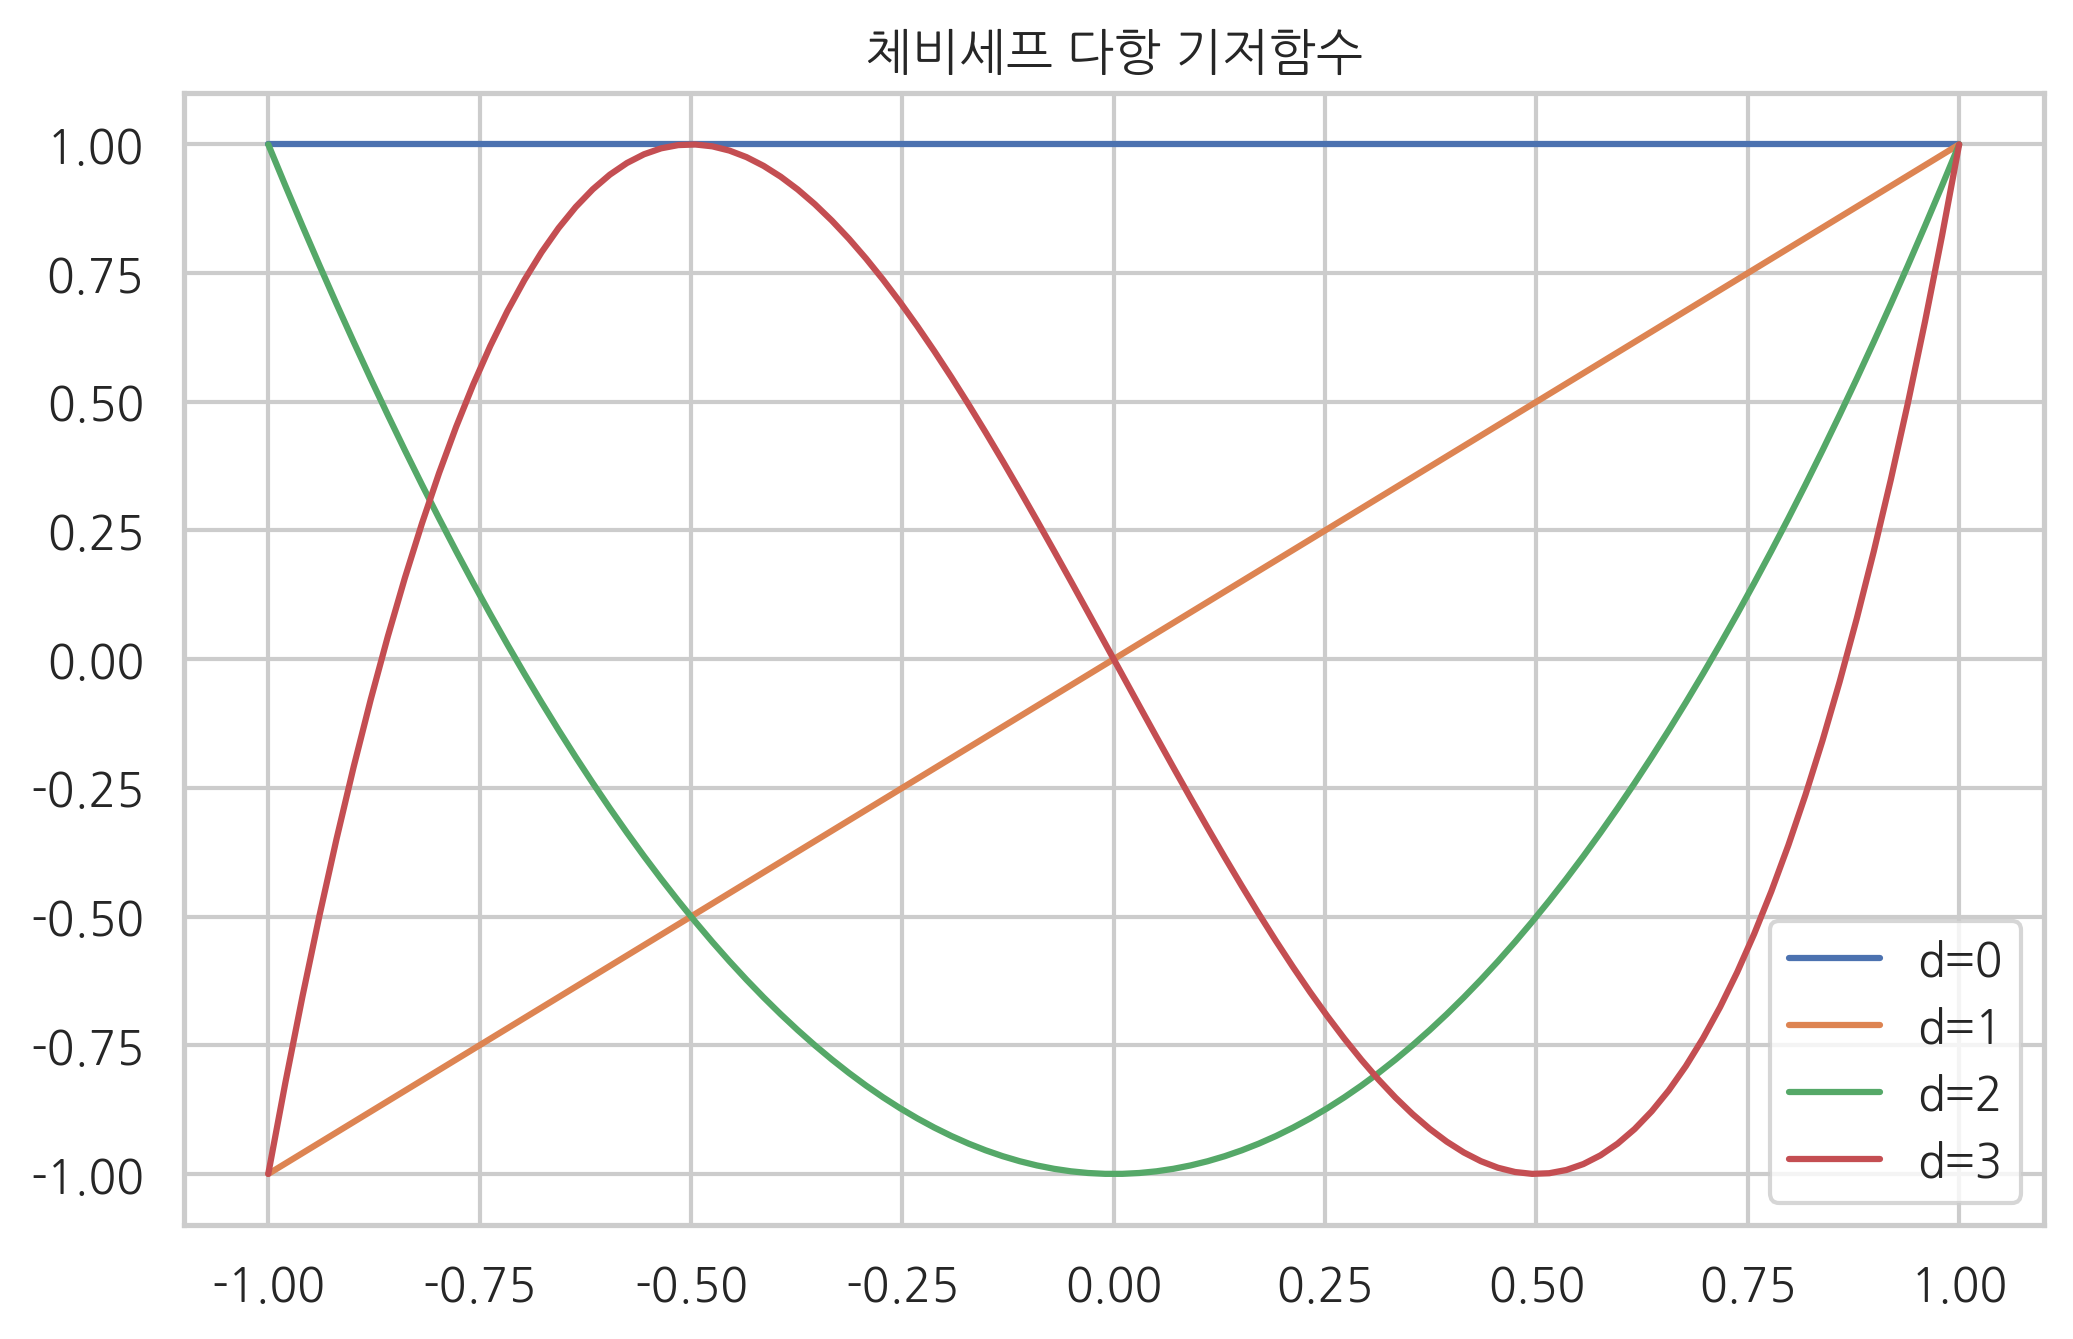

In [3]:
phi_0 = np.polynomial.chebyshev.Chebyshev.basis(0)
phi_1 = np.polynomial.chebyshev.Chebyshev.basis(1)
phi_2 = np.polynomial.chebyshev.Chebyshev.basis(2)
phi_3 = np.polynomial.chebyshev.Chebyshev.basis(3)

x = np.linspace(-1, 1, 100)

plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.legend()
plt.title("체비세프 다항 기저함수")
plt.show()

이외에도 다음과 같은 기저함수들도 존재한다.

* 방사 기저함수

* 삼각 기저함수

* 시그모이드 기저함수

### StatsModels를 이용한 다항회귀

StatsModels에서는 `OLS` 클래스의 `from_formula` 메서드를 사용하여 다항회귀를 할 수 있다.

In [4]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.69e-06
Time:                        17:40:22   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

In [5]:
print(sm.OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     18.38
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           9.14e-06
Time:                        17:40:22   Log-Likelihood:                -14.953
No. Observations:                  30   AIC:                             35.91
Df Residuals:                      27   BIC:                             40.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8638      0.248      3.487      0.0

In [6]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.06e-17
Time:                        17:40:22   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

회귀분석 결과를 그림으로 그리면 다음과 같다.

In [7]:
def polyreg(degree, seed=0, ax=None):
    X, y = make_nonlinear(seed)

    dfX = pd.DataFrame(X, columns=["x"])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=["y"])
    df = pd.concat([dfX, dfy], axis=1)

    model_str = "y ~ "
    for i in range(degree):
        if i == 0:
            prefix = ""
        else:
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()

    if ax:
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("차수={}, 시드값={}".format(degree, seed))
        xlabel = "\n".join(str(result.params).split("\n")[:-1])
        font = {'family': 'NanumGothicCoding', 'color':  'black', 'size': 10}
        ax.set_xlabel(xlabel, fontdict=font)

    return result

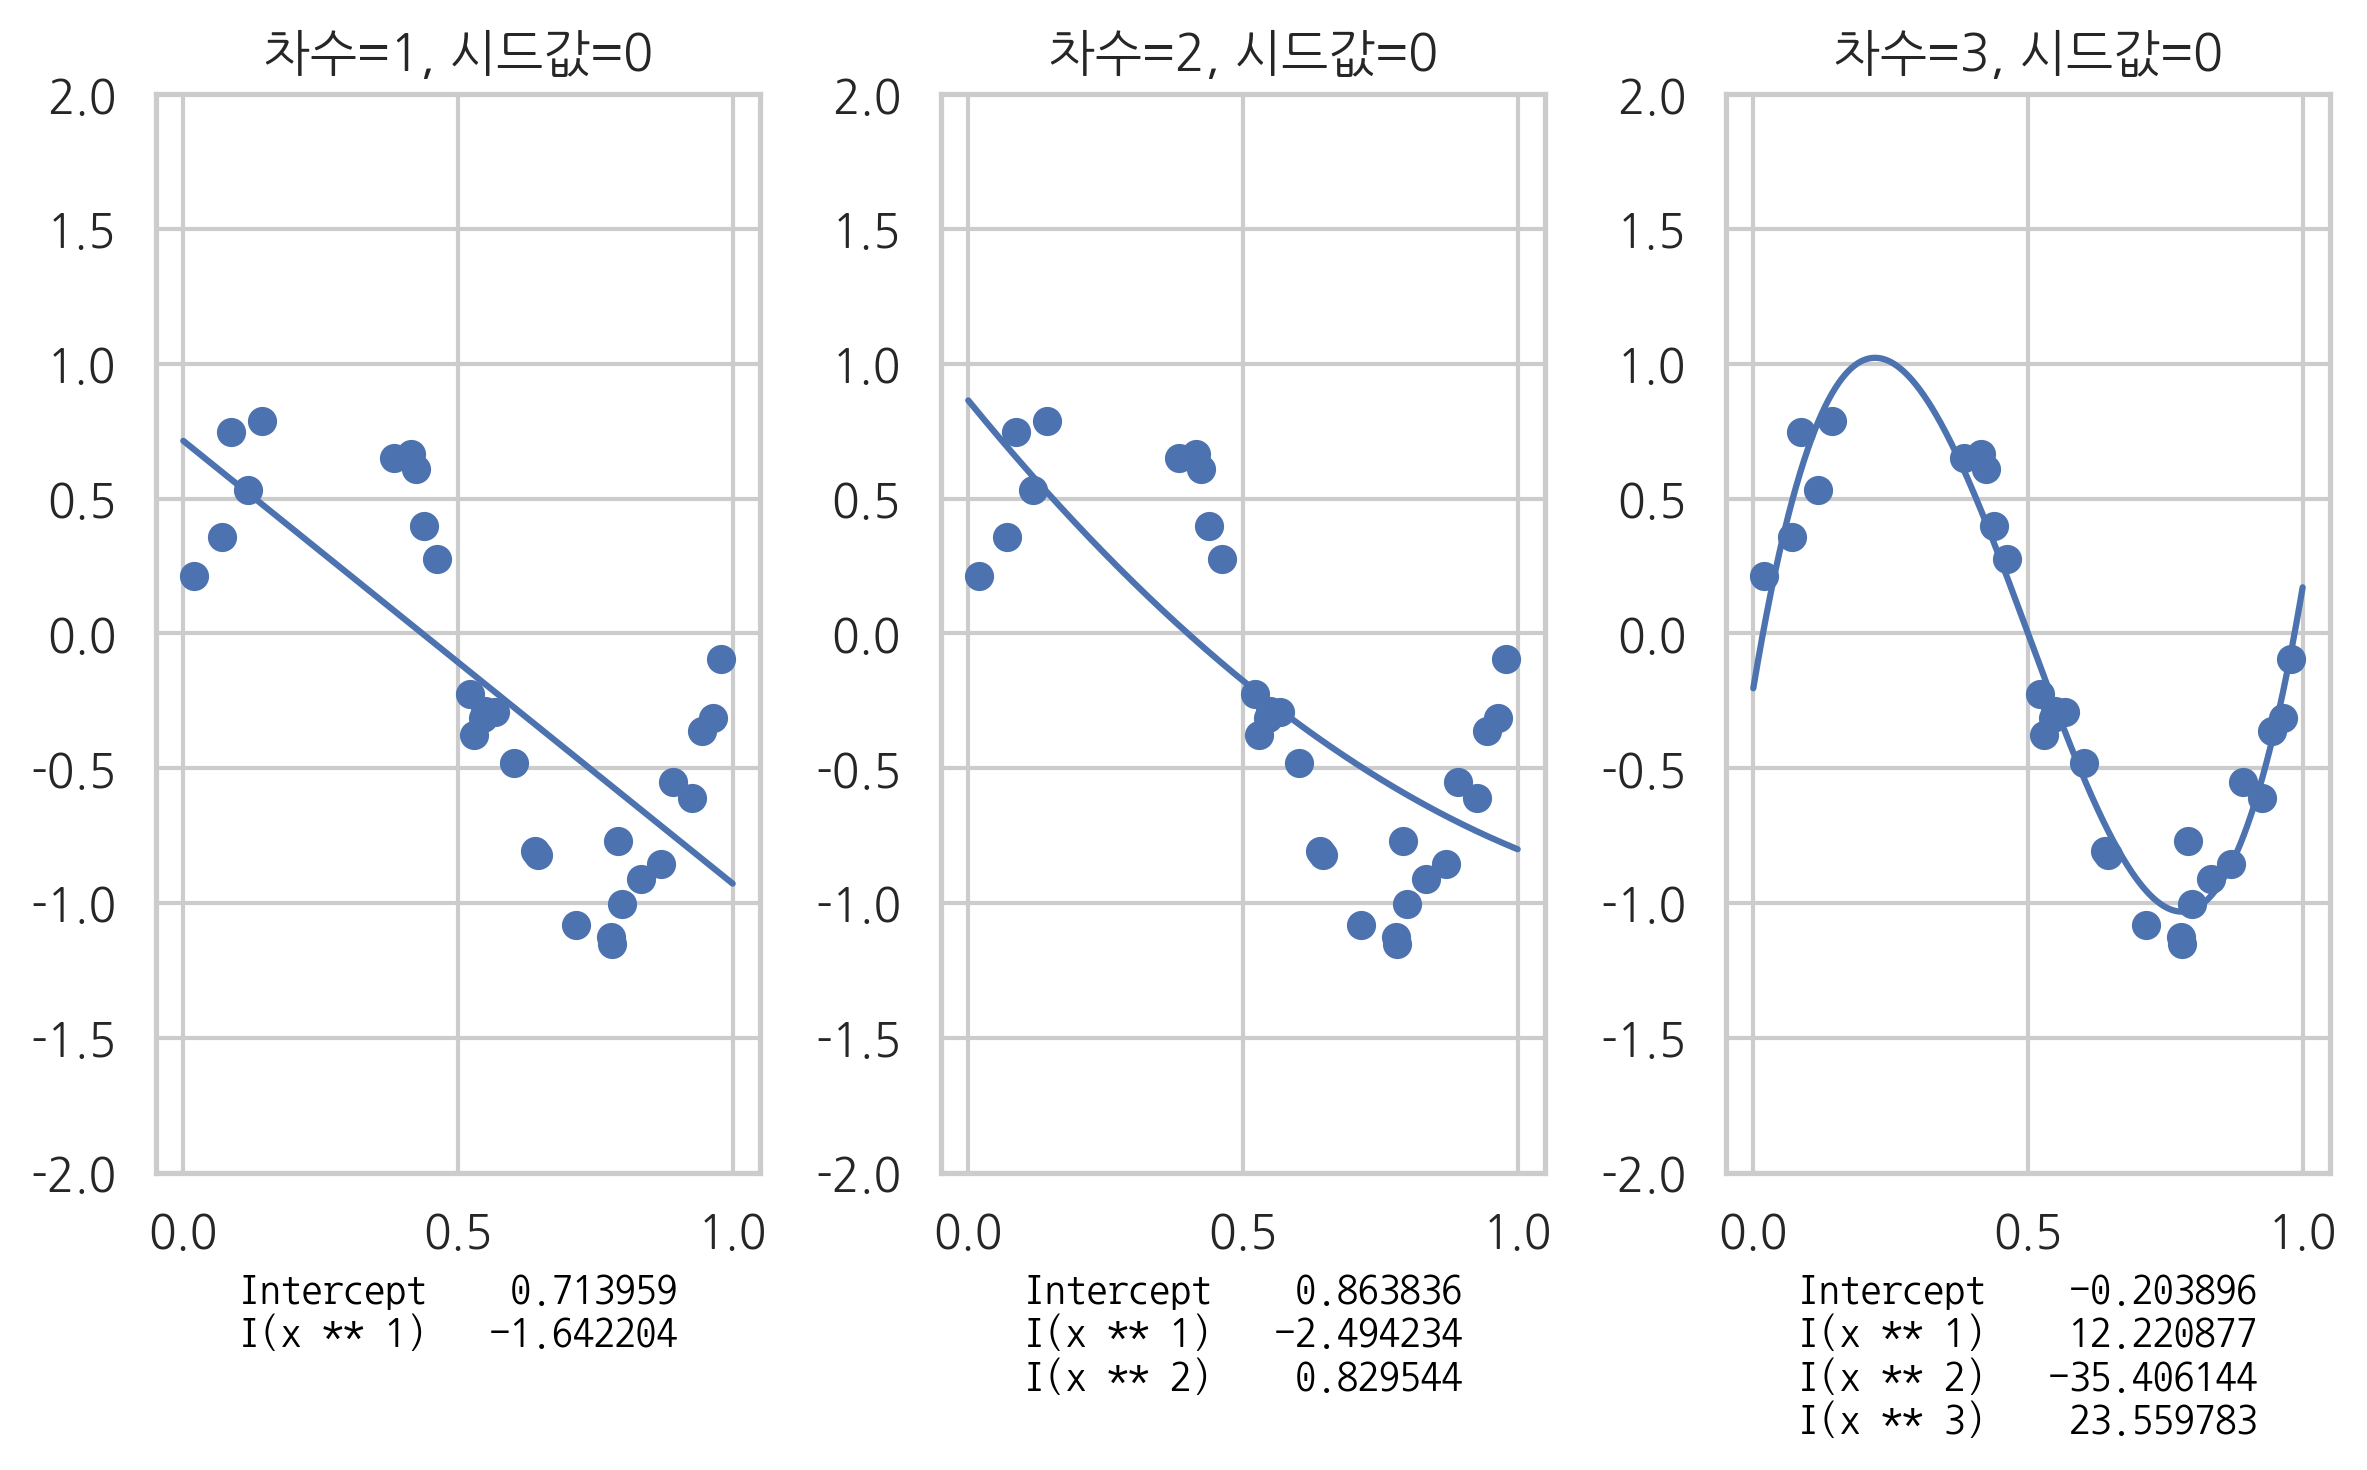

In [8]:
ax1 = plt.subplot(131)
polyreg(1, ax=ax1)
ax2 = plt.subplot(132)
polyreg(2, ax=ax2)
ax3 = plt.subplot(133)
polyreg(3, ax=ax3)
plt.tight_layout()
plt.show()

### 과최적화

모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 과최적화(overfitting)이라고 한다.

과최적화는 
* 독립 변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나 
* 독립 변수 데이터가 서로 독립이 아닌 경우에 발생한다.

이러한 상황에서는 같은 조건에 대해 답이 복수개 존재할 수 있기 때문이다. 

과최적화가 문제가 되는 이유는 다음과 같다.

* 트레이닝에 사용되지 않은 새로운 독립 변수 값을 입력하면 오차가 커진다. (cross-validation 오차)
* 샘플이 조금만 변화해도 가중치 계수의 값이 크게 달라진다. (추정의 부정확함)



다음 그림에서 과최적화가 발생하면 주어진 데이터가 아닌 다른 새로운 x 데이터가 들어올 때 오차가 커지는 것을 볼 수 있다.

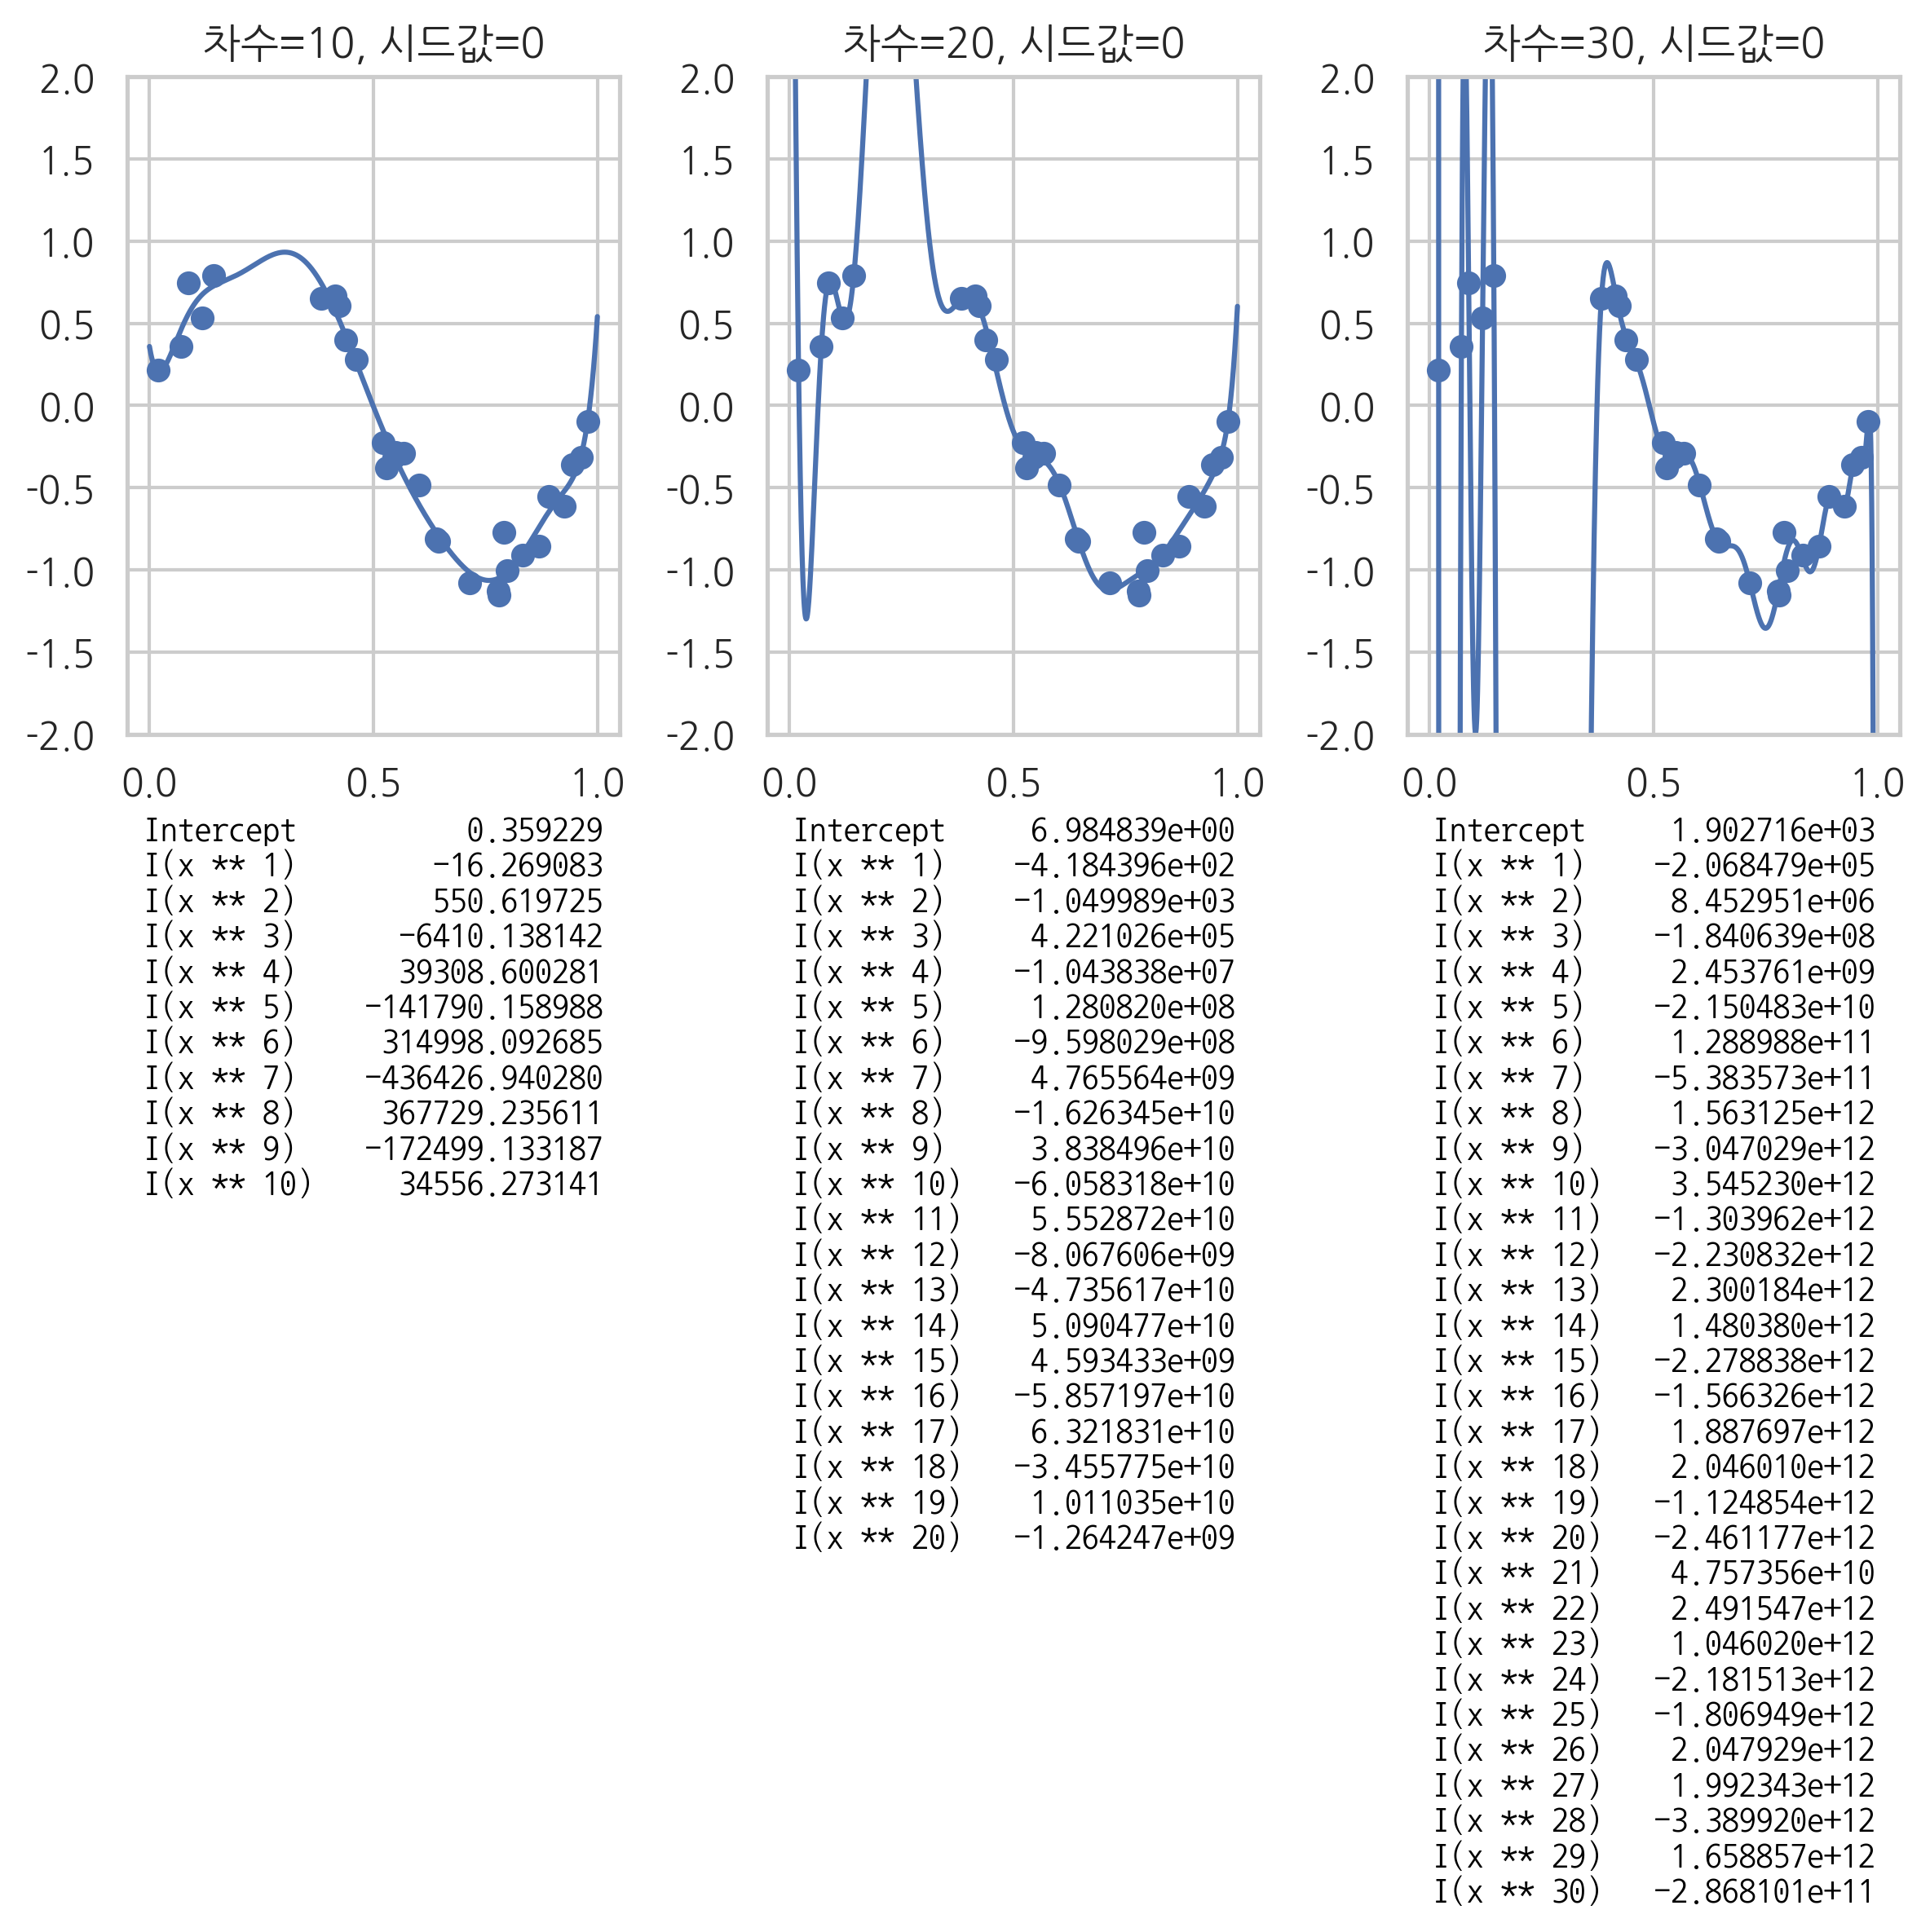

In [9]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(10, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, ax=ax2)
ax3 = plt.subplot(133)
polyreg(30, ax=ax3)
plt.tight_layout()
plt.show()

또한 데이터가 조금만 달라져도 가중치 값이 크게 달라지는 것도 확인할 수 있다. 

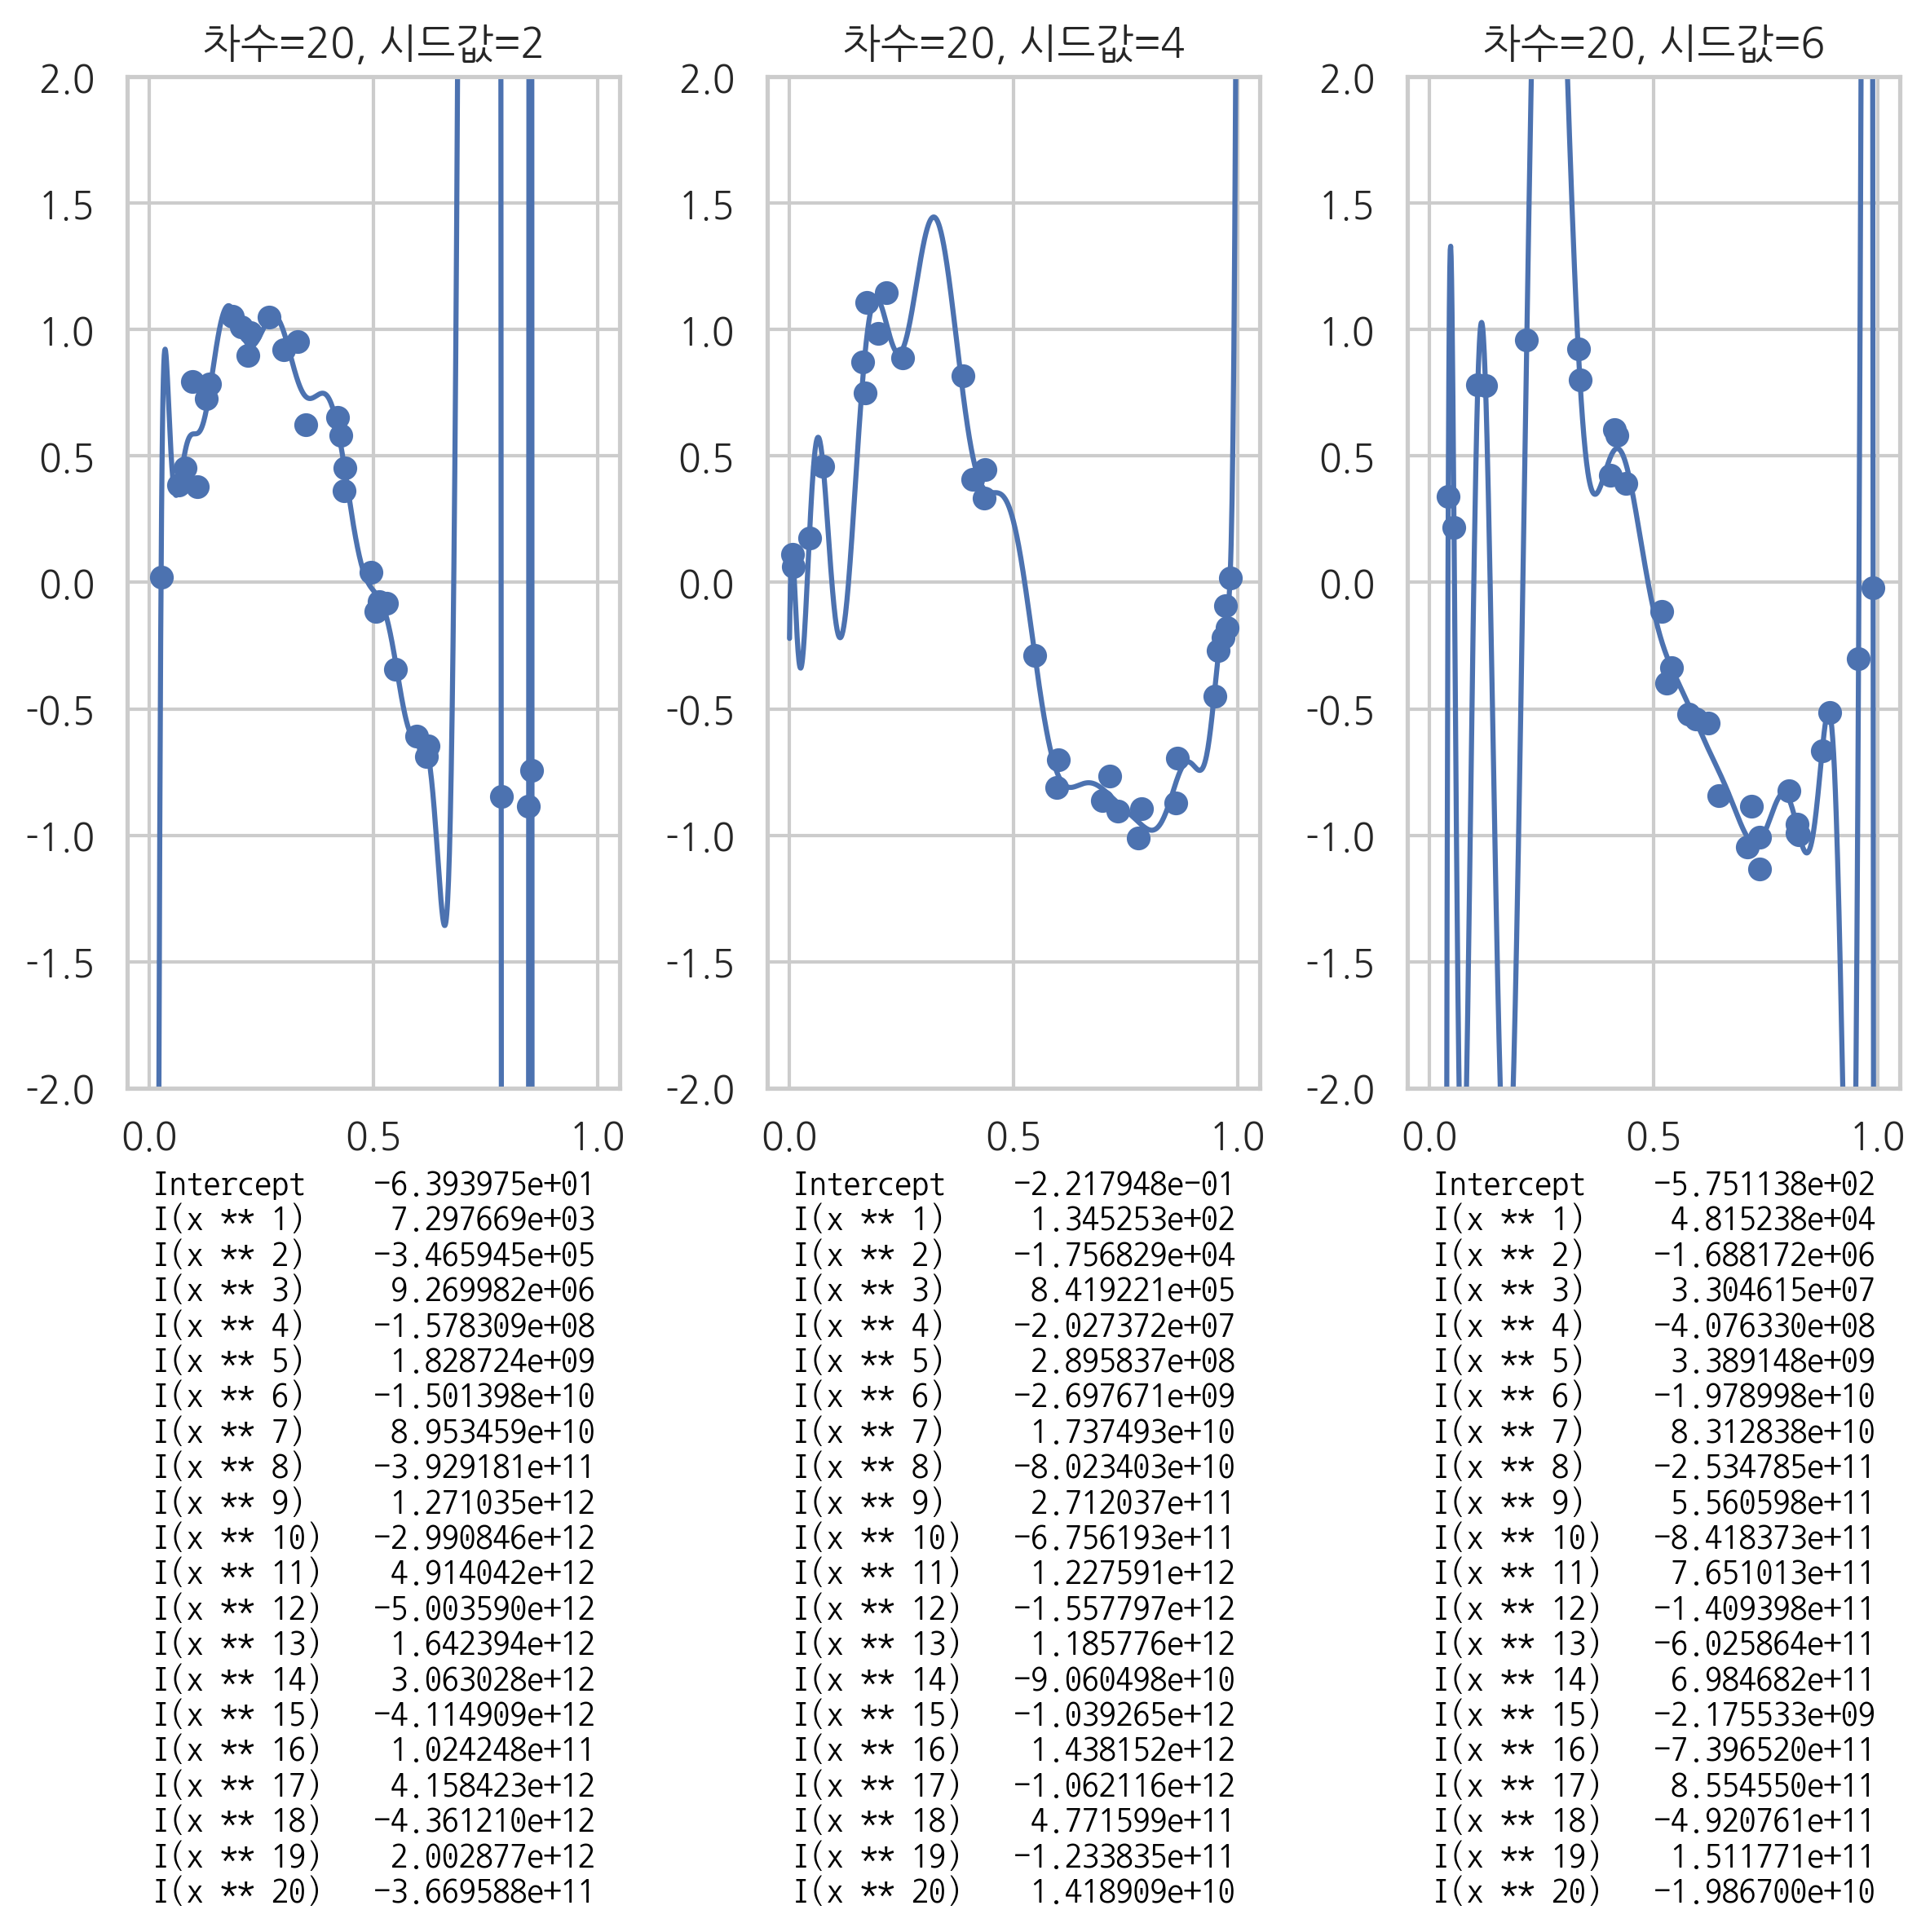

In [10]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)
ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)
plt.tight_layout()
plt.show()